# Plotting with Matplotlib

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter


In [3]:
df = pd.read_csv('survey_results_public.csv', index_col='ResponseId')



In [28]:
AgeGroup_Salary= df.groupby('Age')['ConvertedCompYearly'].mean().astype(int).reset_index()
AgeGroup_Salary

,Age,ConvertedCompYearly
0,18-24 years old,98973
1,25-34 years old,156513
2,35-44 years old,202940
3,45-54 years old,221254
4,55-64 years old,281125
5,65 years or older,241075
6,Prefer not to say,214925
7,Under 18 years old,122322


In [5]:
AgeGroup_Salary.sort_values(by='ConvertedCompYearly', ascending=False, inplace=True)
AgeGroup_Salary

,Age,ConvertedCompYearly
4,55-64 years old,281125
5,65 years or older,241075
3,45-54 years old,221254
6,Prefer not to say,214925
2,35-44 years old,202940
1,25-34 years old,156513
7,Under 18 years old,122322
0,18-24 years old,98973


Text(0.5, 1.0, 'Average Salary by Age')

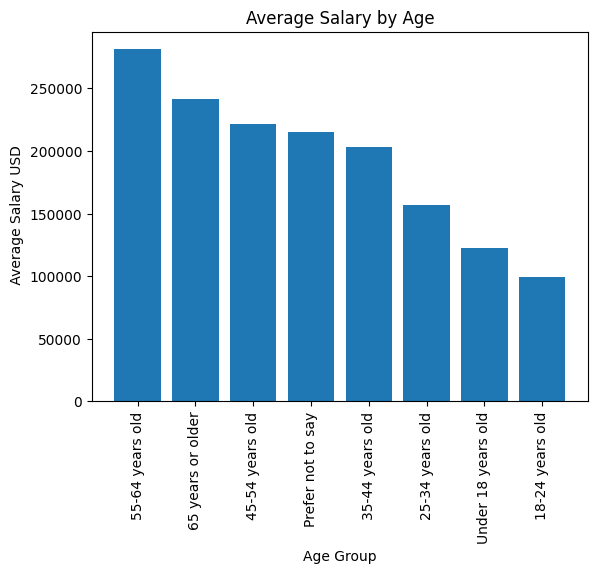

In [6]:
plt.bar(AgeGroup_Salary.Age, AgeGroup_Salary.ConvertedCompYearly)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel(" Average Salary USD")
plt.xlabel("Age Group")
plt.title('Average Salary by Age')

Text(0.5, 1.0, 'Average Salary by Age')

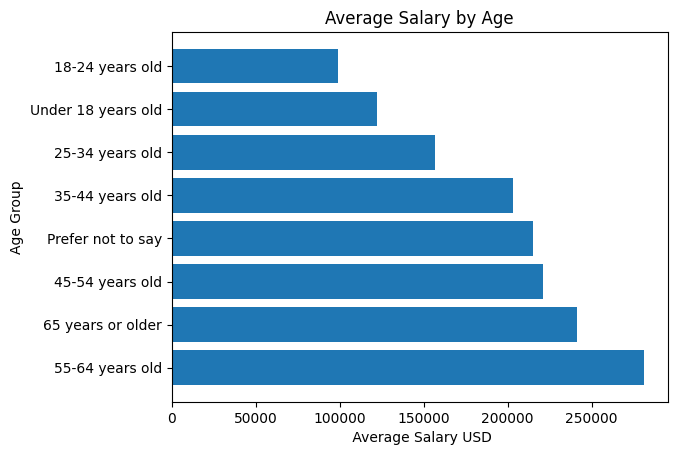

In [7]:
#using horizontal bar chart
plt.barh(AgeGroup_Salary.Age, AgeGroup_Salary.ConvertedCompYearly)
plt.xlabel(" Average Salary USD")
plt.ylabel("Age Group")
plt.title('Average Salary by Age')

In [8]:
languages_df = df.loc[:, 'LanguageHaveWorkedWith'].dropna().to_frame() #create dataframe of languages and drop NaN values
languages_df

,LanguageHaveWorkedWith
ResponseId,
2,JavaScript;TypeScript
3,C#;C++;HTML/CSS;JavaScript;Python
4,C#;JavaScript;SQL;TypeScript
5,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
6,C++;Lua
...,...
73264,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265,Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266,HTML/CSS;JavaScript;PHP;Python;SQL


Counter({'JavaScript': 46443, 'HTML/CSS': 39142, 'SQL': 35127, 'Python': 34155, 'TypeScript': 24752, 'Java': 23644, 'Bash/Shell': 20656, 'C#': 19883, 'C++': 16024, 'PHP': 14827, 'C': 13692, 'PowerShell': 8575, 'Go': 7922, 'Rust': 6625, 'Kotlin': 6507, 'Dart': 4648, 'Ruby': 4299, 'Assembly': 3887, 'Swift': 3489, 'R': 3308, 'VBA': 3185, 'MATLAB': 2913, 'Lua': 2867, 'Groovy': 2357, 'Delphi': 2311, 'Scala': 1837, 'Objective-C': 1698, 'Perl': 1644, 'Haskell': 1577, 'Elixir': 1528, 'Julia': 1084, 'Clojure': 1070, 'Solidity': 1031, 'LISP': 932, 'F#': 730, 'Fortran': 646, 'Erlang': 641, 'APL': 504, 'COBOL': 464, 'SAS': 435, 'OCaml': 422, 'Crystal': 340})


<Figure size 1000x1500 with 0 Axes>

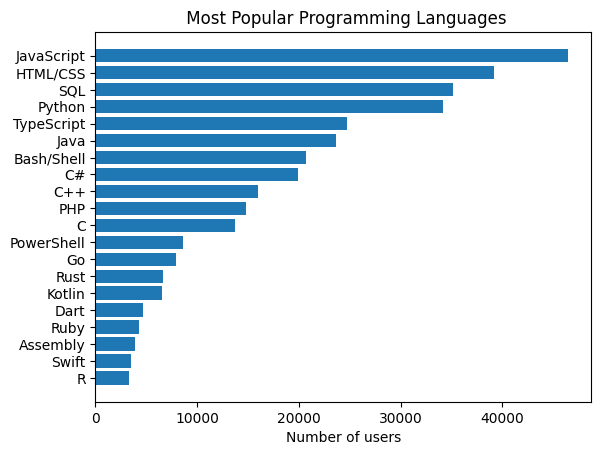

In [39]:
languages = languages_df['LanguageHaveWorkedWith'].str.split(';')
languages
#languages = sum(languages, [])
languages = [language for sublist in languages for language in sublist] #flatten list of lists this creates a long list that can be counted
languages
language_counts = Counter(languages)
# print (language_counts)

popular_languages=[]
popularity=[]
for item in language_counts.most_common(20):
    popular_languages.append(item[0])
    popularity.append(item[1])

popular_languages.reverse()
popularity.reverse() 
plt.style.use("default")
plt.barh(popular_languages,popularity)
plt.title(' Most Popular Programming Languages')
plt.xlabel('Number of users')
plt.Figure(figsize=(10,15))



Text(0.5, 1.0, ' Most Popular Programming Languages')

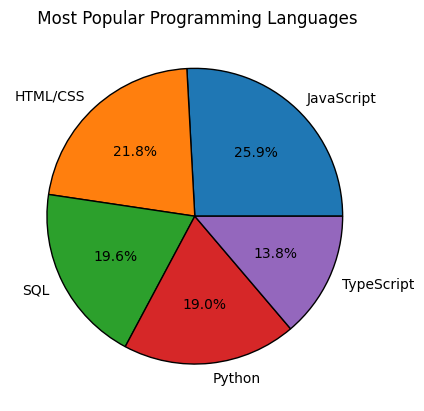

In [10]:
popular_languages_lables=[]
slices=[]
for item in language_counts.most_common(5):
    popular_languages_lables.append(item[0])
    slices.append(item[1])

plt.pie(slices, labels= popular_languages_lables,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title(' Most Popular Programming Languages')


Text(0, 0.5, 'Number of respondents')

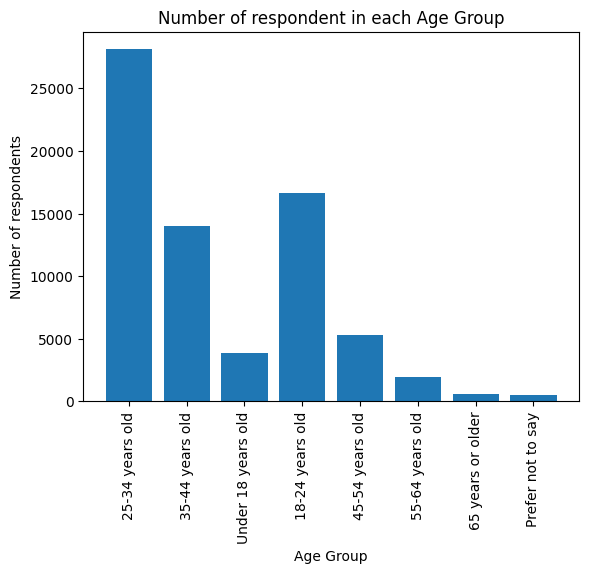

In [41]:
AgeGroup_Resp_bar= df.loc[:, 'Age'].dropna().to_frame().reset_index()
Age_counts = Counter(AgeGroup_Resp_bar['Age'])
# print(Age_counts)
Age_range=[]
Age_freq=[]
for item in Age_counts.items():
    Age_range.append(item[0])
    Age_freq.append(item[1])
plt.bar(Age_range,Age_freq)
plt.xticks(fontsize=10, rotation=90)
plt.title('Number of respondent in each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of respondents')

In [12]:
rename_dict = {
    "25-34 years old": 29,
    "18-24 years old": 21,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "Under 18 years old": 17,
    "55-64 years old": 59,
    "65 years or older": 80,
    "Prefer not to say": 0,
}
AgeGroup_Resp['Age'] = AgeGroup_Resp['Age'].replace(rename_dict)
AgeGroup_Resp = AgeGroup_Resp[AgeGroup_Resp['Age'] != 0]
AgeGroup_Resp


,ResponseId,Age
0,3,29
1,4,39
2,5,29
3,6,29
4,7,17
...,...,...
70941,73264,29
70942,73265,29
70943,73266,59
70944,73267,59


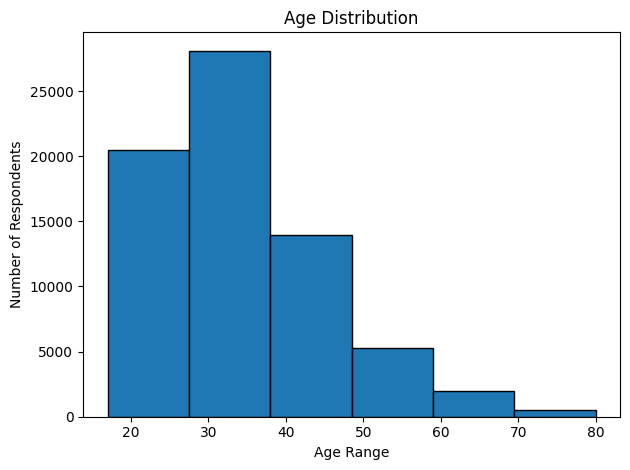

In [13]:
plt.hist(AgeGroup_Resp['Age'], bins=6, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age Range")
plt.ylabel("Number of Respondents")
plt.tight_layout()